# Analyse Cancer Data


## Task A
## Enable the user to get data from a CSV file

In [2]:
import csv

'''
    Defining some constants and variables that
    will be used throughout the system
    at the beginning of the file for easy access.
'''

# constant - directory where the datasets are stored
data_path = "Data/"
# a fundamental variable placed here for easy access
file_name = ""
# another fundamental veriable used throughout the system
csv_reader = []

In [3]:
import csv

# prompt the user to enter the dataset to be analysed
file_name = input("Enter the name of the CSV file from the Data directory...")
# file_name = "lung_cancer_data.csv"
patient_headers = []
    
try:
    with open(data_path+file_name, 'r', encoding='utf8', newline='') as fp:
        ''' turn the csv reader into a list containing the entire dataset
            so that we only have to open the file and use the file object
            once.
        '''
        csv_reader = list(csv.reader(fp.readlines(), delimiter=','))
        ''' using a list allows traversal as many times as needed.
            Since this is no longer an iterator that is consumed once,
            remove the header row from the list
        '''
        patient_headers = csv_reader.pop(0)
        ''' creating a mapping to efficiently look up the column index
            from the header row
        '''
        patient_headers = {v: i for i,v in enumerate(patient_headers)}
except FileNotFoundError as e:
    print("Ensure the filename has been entered correctly")
    print(e)

# development purposes only
print(patient_headers)


{'Patient_ID': 0, 'Age': 1, 'Gender': 2, 'Smoking_History': 3, 'Tumor_Size_mm': 4, 'Tumor_Location': 5, 'Stage': 6, 'Treatment': 7, 'Survival_Months': 8, 'Ethnicity': 9, 'Insurance_Type': 10, 'Family_History': 11, 'Comorbidity_Diabetes': 12, 'Comorbidity_Hypertension': 13, 'Comorbidity_Heart_Disease': 14, 'Comorbidity_Chronic_Lung_Disease': 15, 'Comorbidity_Kidney_Disease': 16, 'Comorbidity_Autoimmune_Disease': 17, 'Comorbidity_Other': 18, 'Performance_Status': 19, 'Blood_Pressure_Systolic': 20, 'Blood_Pressure_Diastolic': 21, 'Blood_Pressure_Pulse': 22, 'Haemoglobin_Level': 23, 'White_Blood_Cell_Count': 24, 'Platelet_Count': 25, 'Albumin_Level': 26, 'Alkaline_Phosphatase_Level': 27, 'Alanine_Aminotransferase_Level': 28, 'Aspartate_Aminotransferase_Level': 29, 'Creatinine_Level': 30, 'LDH_Level': 31, 'Calcium_Level': 32, 'Phosphorus_Level': 33, 'Glucose_Level': 34, 'Potassium_Level': 35, 'Sodium_Level': 36, 'Smoking_Pack_Years': 37}


In [4]:
def display_extracted_data(columns:list, records:list, limit_rows=50):
    """
    Print the data extract in a pretty, tablular style
    
    Args:
        columns (list): string names of the columns within
                        the records passed to the function.

        records (list): a list of dictionaries containing 
                        the relevant data to be displayed
    """
    # Base case - if no records where found, tell the user
    if len(records) == 0:
        print("No records found!")
        return

    ''' find the longest header name which will be used to
        specific the header width for all columns. '''
    column_width = max([len(col) for col in columns])
    separator = '|'
    formatted_cols = [separator]
    for col in columns:
        # left-align by, at most, the maximum desired column width
        formatted_cols.append(f" {col:<{column_width}} |")
        
    # This tightly joins each header to the adjacent separator.
    header_row = "".join(formatted_cols)
    # underline the table header and print both
    print(f"{header_row}\n{'-' * len(header_row)}")

    item_cols = ['|']
    count = 0
    limit_reached = False
    for record in records:
        if limit_reached:
            break
        for value in record.values():
            item_cols.append(f" {value:<{column_width}} |")
            count += 1
            if count == len(columns):
                # place the next set of data on the next line
                item_cols.append('\n')
                item_cols.append(separator)
                limit_rows -= 1
                count = 0
            if limit_rows == 0:
                limit_reached = True
                break
                
    # get rid of the trailing separator which appears on a new line at the end of the table
    item_cols.pop(-1)
    # display each row of data, formatted to align to the table display
    print("".join(item_cols))
    
def extract_data(columns:list, record:list) -> list:
    """
    Extract the relevant data from a row into a dictionary
    that looks like:
        {column_header: data_value, ...}
        
    This saves on code repetition when storing the specific
    data to be analysed in a new data structure.
        
    Args:
        columns (list): the specific columns to extract
                        from the row.
        record (list): a single row of data.
        
    Returns:
        dict: of values mapped to keys from the specified columns.
    """
    records = {}
    for column in columns:
        records.update(
            {
                column: record[patient_headers[column]]
            }
        )
    return records  

## a1. Retrieve demographic information: age, gender, smoking history, and ethnicity based on the patient ID

In [5]:
# contains the specific values from the columns, mapped to their respective key headings.
demographic_info = {}
columns = ['Age', 'Gender', 'Smoking_History', 'Ethnicity']

try:
    patient_id = int(input("Enter patient ID to retrieve demographic information..."), base=10)
except ValueError:
    print("please enter a valid numerical value for the patient ID")
else:
    for record in csv_reader:
        if int(record[patient_headers['Patient_ID']]) == patient_id:
            for column in columns:
                ''' look up the row index from the column heading string
                    and assign the value in the row to the dictionary, 
                    providing the heading string as a key
                '''
                demographic_info[column] = record[patient_headers[column]]

    if(len(demographic_info) > 0):  
        print(f"Demographic info for patient ID: {patient_id}")
        display_extracted_data(columns, [demographic_info])
    else:
        print("Patient ID not found!")
        

Demographic info for patient ID: 45659
| Age             | Gender          | Smoking_History | Ethnicity       |
-------------------------------------------------------------------------
| 48              | Male            | Current Smoker  | African American |



## a2. Retrieve medical history details including family history of lung cancer, comorbidities of diabetes disease, comorbidities of kidney disease, and the haemoglobin level associated with a certain ethnicity. 

In [6]:
''' This list will contain dictionaries of the specific values,
    mapped to a key representing the column heading string '''
medical_history = []
columns = ['Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Kidney_Disease', 'Haemoglobin_Level']

ethnicity = input("Enter the patient ethnicity...")

for record in csv_reader:
    if ethnicity.lower() in record[patient_headers['Ethnicity']].lower():
        medical_history.append(extract_data(columns, record))
    
print(f"Records for patients of {ethnicity.capitalize()} ethnicity:")
display_extracted_data(columns, medical_history, limit_rows=20)
        

Records for patients of Asian ethnicity:
| Family_History             | Comorbidity_Diabetes       | Comorbidity_Kidney_Disease | Haemoglobin_Level          |
---------------------------------------------------------------------------------------------------------------------
| Yes                        | Yes                        | Yes                        | 16.8                       |
| No                         | Yes                        | Yes                        | 13.55                      |
| No                         | No                         | No                         | 16.24                      |
| Yes                        | Yes                        | No                         | 15.16                      |
| No                         | Yes                        | No                         | 11.22                      |
| Yes                        | No                         | No                         | 12.57                      |
| No           

## a3. Retrieve treatment details including age, tumor size, tumor location, and tumor stage of patients who have survived more than 100 months on a certain treatment. 

In [7]:
survival_period_months = 100
long_term = []
columns = ['Age', 'Tumor_Size_mm', 'Tumor_Location', 'Stage']

for record in csv_reader:
    if int(record[patient_headers['Survival_Months']]) > survival_period_months:
        long_term.append(
            extract_data(columns, record)
        )

print(f"Patient records for survival greater than {survival_period_months} months on treatment:\n")
display_extracted_data(columns, long_term)


Patient records for survival greater than 100 months on treatment:

| Age            | Tumor_Size_mm  | Tumor_Location | Stage          |
---------------------------------------------------------------------
| 58             | 78.45          | Lower Lobe     | Stage I        |
| 37             | 87.27          | Lower Lobe     | Stage IV       |
| 48             | 68.1           | Lower Lobe     | Stage IV       |
| 51             | 35.15          | Upper Lobe     | Stage I        |
| 31             | 86.46          | Upper Lobe     | Stage III      |
| 41             | 69.33          | Upper Lobe     | Stage III      |
| 51             | 28.12          | Middle Lobe    | Stage III      |
| 78             | 40.47          | Middle Lobe    | Stage IV       |
| 50             | 17.51          | Lower Lobe     | Stage IV       |
| 76             | 58.55          | Lower Lobe     | Stage IV       |
| 73             | 61.59          | Lower Lobe     | Stage III      |
| 76             | 20.

## a4. For patients that have high blood pressure...
### display treatment type, insurance type, performance status and whether the patient has chronic lung disease.



In [8]:
''' 
    use a suitable value for patient's blood pressure above a desired target
    for cancer patient's. Value obtained from:
    https://cardiooncologyjournal.biomedcentral.com/articles/10.1186/s40959-023-00197-8
'''
blood_press_diastolic_target = 140
treatment_records = []
columns = ['Treatment', 'Insurance_Type', 'Performance_Status', 'Comorbidity_Chronic_Lung_Disease']

for record in csv_reader:
    # is the patient hypertensive or blood pressure above 140
    if record[patient_headers['Comorbidity_Hypertension']] or \
        record[patient_headers['Blood_Pressure_Diastolic']] > blood_press_diastolic_target:
            treatment_records.append(
                extract_data(columns, record)
            )

print(f"Treatment records for patients with diastolic blood pressure above {blood_press_diastolic_target} target or hypertension:\n")

display_extracted_data(columns, treatment_records)


Treatment records for patients with diastolic blood pressure above 140 target or hypertension:

| Treatment                        | Insurance_Type                   | Performance_Status               | Comorbidity_Chronic_Lung_Disease |
---------------------------------------------------------------------------------------------------------------------------------------------
| Surgery                          | Medicare                         | 3                                | No                               |
| Radiation Therapy                | Private                          | 4                                | No                               |
| Chemotherapy                     | Other                            | 0                                | Yes                              |
| Chemotherapy                     | Medicare                         | 1                                | No                               |
| Radiation Therapy                | Medicaid       

# Task B

In [6]:
import pandas as pd

lung_cancer_df = pd.read_csv(data_path+file_name, sep=',', encoding='utf8')

# lung_cancer_df.head()

## b1. Identify the top 3 treatments for a certain ethnicity where patients have survived more than 100 months.

In [114]:
# filter the dataset for patients where the survival was greater than 100 months
long_term_df = lung_cancer_df.loc[lung_cancer_df.Survival_Months > 100, :]

'''group the filtered dataframe by ethnicity.
   count each treatment within each group.
   value_counts will provide the counts in descending order.
   Group by ethnicity again so that the top three rows can be obtained
   finally, reset the index to transform the multi-level series to columns
   in a new Series
   n.b in-place will not work as this combination is a group-by Series'''
long_term_ethnic_groups = long_term_df.groupby('Ethnicity')\
    .Treatment\
        .value_counts()\
            .reset_index()\
                .groupby('Ethnicity')\
                    .head(3)
                    
long_term_ethnic_groups

,Ethnicity,Treatment,count
0,African American,Chemotherapy,209
1,African American,Radiation Therapy,181
2,African American,Targeted Therapy,168
4,Asian,Surgery,288
5,Asian,Radiation Therapy,224
6,Asian,Chemotherapy,149
8,Caucasian,Chemotherapy,350
9,Caucasian,Radiation Therapy,188
10,Caucasian,Surgery,170
12,Hispanic,Chemotherapy,333


## b2. Analyse the average white blood cell counts for certain treatments based on a certain ethnicity.

In [11]:
white_blood_df = lung_cancer_df.groupby(['Ethnicity', 'Treatment']).White_Blood_Cell_Count.mean().reset_index()

white_blood_df

,Ethnicity,Treatment,White_Blood_Cell_Count
0,African American,Chemotherapy,6.654709
1,African American,Radiation Therapy,6.666268
2,African American,Surgery,6.638981
3,African American,Targeted Therapy,6.741863
4,Asian,Chemotherapy,6.765347
5,Asian,Radiation Therapy,6.735361
6,Asian,Surgery,6.761766
7,Asian,Targeted Therapy,6.623431
8,Caucasian,Chemotherapy,6.750183
9,Caucasian,Radiation Therapy,6.809458


## b3. Analyse the average number of smoking packs for patients in each treatment group, with a blood pressure (pulse) over 90 and a tumor size smaller than 15.0 mm, based by tumor location

In [12]:
# Filter by pulse > 90 and tumor size < 15.0, keeping only the columns we need.
lung_tumor_df = lung_cancer_df.loc[(lung_cancer_df.Blood_Pressure_Pulse > 90) & (lung_cancer_df.Tumor_Size_mm < 15.0), 
                                   ['Smoking_Pack_Years', 'Treatment', 'Tumor_Location']]\
                                       .reset_index()

# group by tumor location and treatment type, finding the average smoking packs for each group
lung_tumor_df = lung_tumor_df.groupby(["Tumor_Location", "Treatment"])\
    .Smoking_Pack_Years.mean()\
        .reset_index()

lung_tumor_df


,Tumor_Location,Treatment,Smoking_Pack_Years
0,Lower Lobe,Chemotherapy,53.168824
1,Lower Lobe,Radiation Therapy,41.365357
2,Lower Lobe,Surgery,51.673684
3,Lower Lobe,Targeted Therapy,43.178000
4,Middle Lobe,Chemotherapy,51.408966
5,Middle Lobe,Radiation Therapy,50.610741
6,Middle Lobe,Surgery,53.086923
7,Middle Lobe,Targeted Therapy,48.728000
8,Upper Lobe,Chemotherapy,55.259167
9,Upper Lobe,Radiation Therapy,54.349583


## b4. Average survival duration and blood pressure metrics for each treatment at each cancer stage, based on gender.

In [13]:
''' Group by gender, treatment, and cancer stage.
    Then, find the average survival duration and blood pressure levels
    for each cancer stage.
    Finally, reset the index to remove the Dataframe levels
    and provide a sequential index
'''
survival_cancer_df = lung_cancer_df.groupby(['Gender', 'Treatment', 'Stage'])\
    [['Survival_Months', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Systolic']].mean()\
        .reset_index()

survival_cancer_df



,Gender,Treatment,Stage,Survival_Months,Blood_Pressure_Diastolic,Blood_Pressure_Systolic
0,Female,Chemotherapy,Stage I,60.248746,84.935807,135.046138
1,Female,Chemotherapy,Stage II,58.147173,84.839181,135.857700
2,Female,Chemotherapy,Stage III,61.280648,84.046606,134.417427
3,Female,Chemotherapy,Stage IV,59.418534,83.984725,134.873727
4,Female,Radiation Therapy,Stage I,60.198903,84.496571,136.865569
5,Female,Radiation Therapy,Stage II,60.234328,84.180597,134.776119
6,Female,Radiation Therapy,Stage III,60.650771,85.026648,135.220196
7,Female,Radiation Therapy,Stage IV,59.798649,84.309459,133.635135
8,Female,Surgery,Stage I,58.836957,84.631988,134.723602
9,Female,Surgery,Stage II,61.122137,84.374046,135.273282


## Task C
### c1. Create a chart to illustrate the proportion of cancer treatments among a certain ethnicity as specified by the user.

In [89]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ethnicity = input("Enter patient ethnicity...")

grp = lung_cancer_df.groupby('Ethnicity')
grp = grp.get_group(ethnicity)

# create a Series of value counts of each treatment
grp_treatment_counts = grp.Treatment.value_counts()

# retrieve the index lables from the Series and put them into a list
treatment_list = grp_treatment_counts.index.to_list()
# get the values of the Series and put into a list
treatment_count = grp_treatment_counts.to_list() #grp['count'].to_list()
# create a figure
fig = plt.figure(figsize=(10,6))

# plot a pie chart
plt.pie(treatment_count, labels=treatment_list, autopct='%1.1f%%')

# set a plot title and legend
plt.title(f"Pie Chart: Cancer treatment for {ethnicity} ethnic group")
plt.legend(loc="upper left", bbox_to_anchor=(0.9,1))

# show the chart
plt.show()


NameError: name 'lung_cancer_df' is not defined

## c2. Create a chart to show the trend of average smoking packs consumption across different cancer stages for each ethnicity within a single chart.

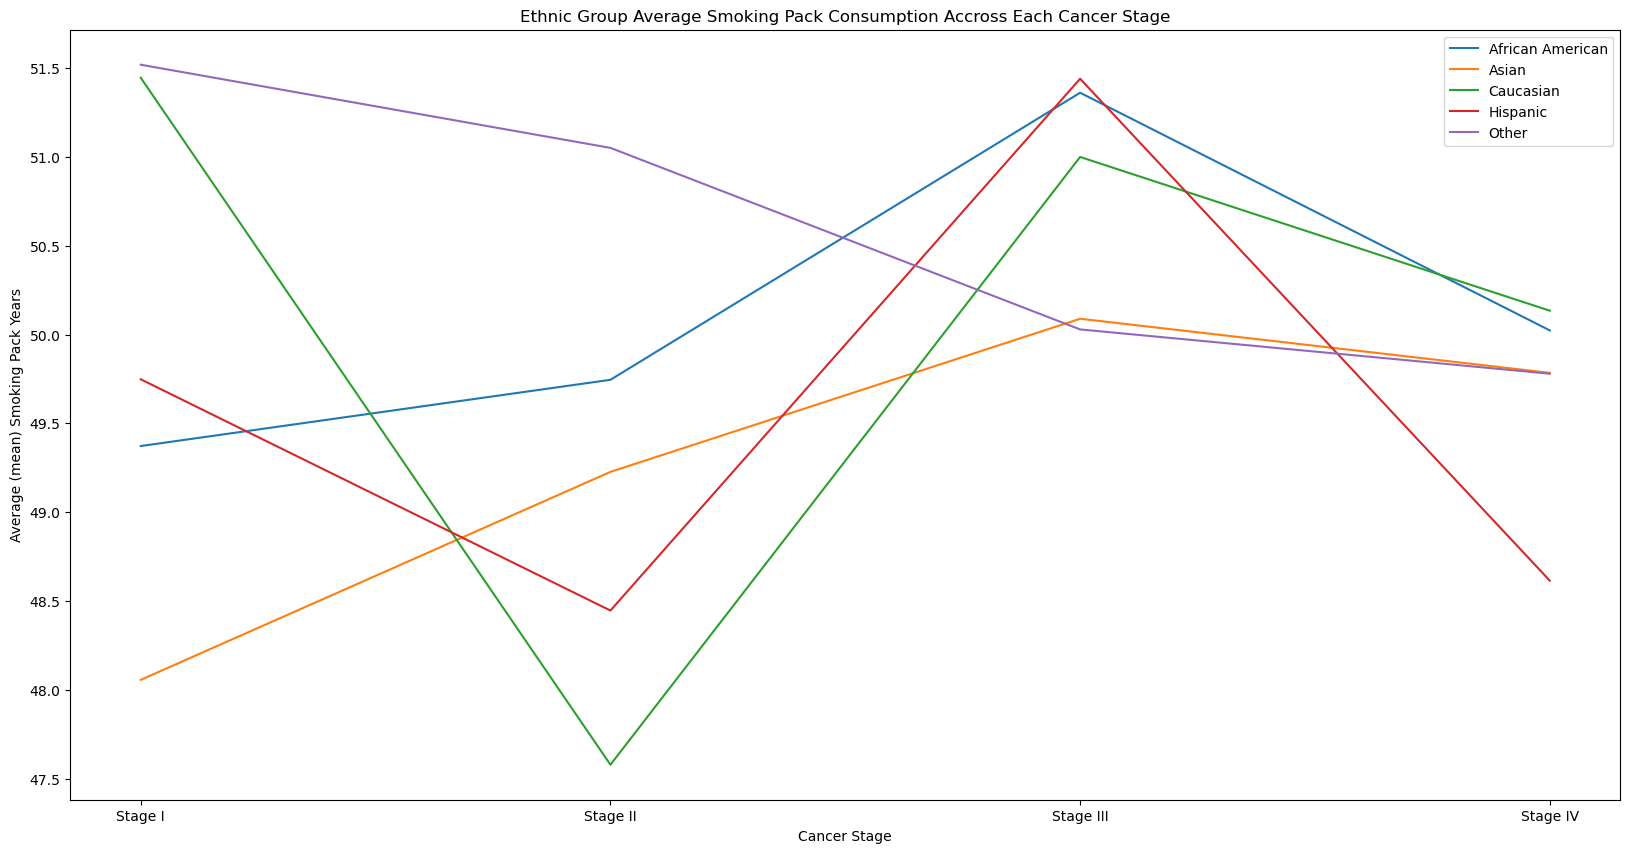

In [74]:
# get Stage, Smoking Pack and Ethnicity columns from the lung cancer DataFrame
smoking_consumption = lung_cancer_df.loc[:, ['Stage', 'Smoking_Pack_Years', 'Ethnicity']]

# in order to determine the average smoking for each cancer stage in each ethnic group
# the DataFrame must first be grouped by ethnicity and stage columns.
smoking_consumption = smoking_consumption.groupby(['Ethnicity', 'Stage'])[['Smoking_Pack_Years']].mean()
smoking_consumption.reset_index(inplace=True)

grp = smoking_consumption.groupby('Ethnicity')

fig = plt.figure(figsize=(20,10))

x_cancer_stages = smoking_consumption.Stage.unique().tolist()
for ethnicity in smoking_consumption.Ethnicity.unique().tolist():
   y_mean_smoking_pack_years = grp.get_group(ethnicity).Smoking_Pack_Years.to_list()
   plt.plot(x_cancer_stages, y_mean_smoking_pack_years, label=ethnicity)

plt.xlabel("Cancer Stage")
plt.ylabel("Average (mean) Smoking Pack Years")
plt.title("Ethnic Group Average Smoking Pack Consumption Accross Each Cancer Stage")
plt.legend()
plt.show()


## c3. Create a chart that visually compares the average of all blood pressure types across different treatment types within a single chart

Blood_Pressure_Systolic     134.462381
Blood_Pressure_Diastolic     84.475780
Blood_Pressure_Pulse         79.585299
dtype: float64


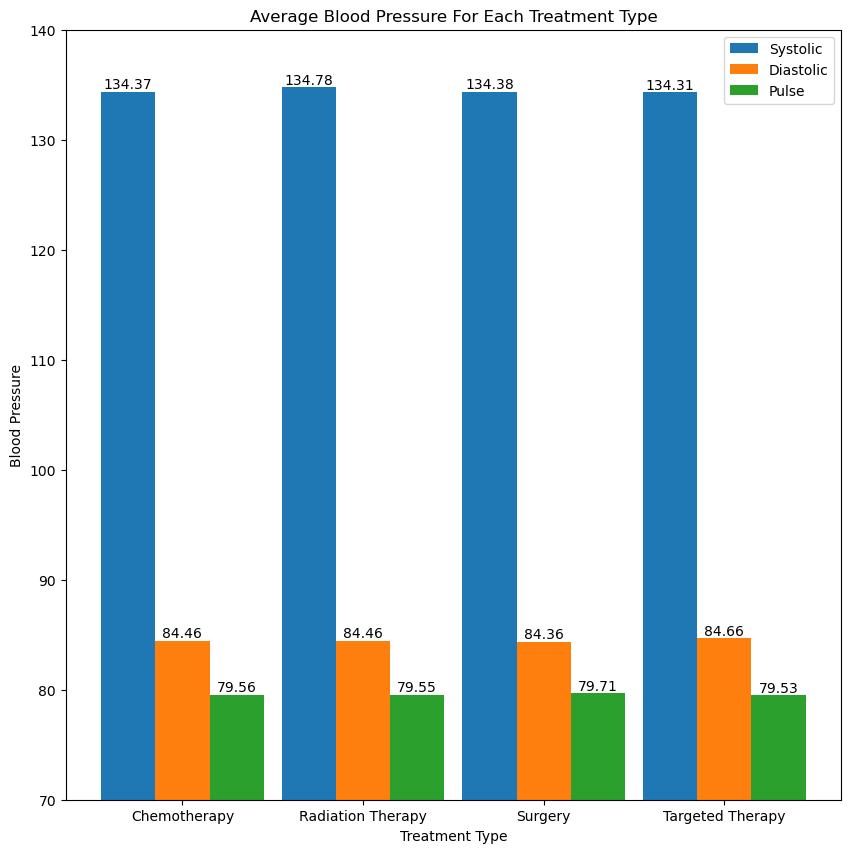

In [ ]:
treatment_blood_press_df = lung_cancer_df.loc[:, ['Treatment', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse']]

treatment_blood_press = treatment_blood_press_df.groupby('Treatment')[['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse']].mean()

x_treatment = treatment_blood_press.index.to_list()
# in order to divide a bar into three, a numpy array is required to offset the bar
x_axis = np.arange(len(x_treatment))

y_systolic = treatment_blood_press.Blood_Pressure_Systolic.to_list()
y_diastolic = treatment_blood_press.Blood_Pressure_Diastolic.to_list()
y_pulse = treatment_blood_press.Blood_Pressure_Pulse.to_list()

fig = plt.figure(figsize=(10,10))

blood_pressure_bars = []
blood_pressure_bars.append(plt.bar(x_axis-0.3, y_systolic, width=0.3, label='Systolic'))
blood_pressure_bars.append(plt.bar(x_axis, y_diastolic, width=0.3, label='Diastolic'))
blood_pressure_bars.append(plt.bar(x_axis+0.3, y_pulse, width=0.3, label="Pulse"))

for bar in blood_pressure_bars:
    plt.bar_label(bar, fmt="%.2f")
plt.xticks(x_axis, x_treatment)
plt.xlabel("Treatment Type")
plt.ylabel("Blood Pressure")
plt.ylim((70,140))
plt.legend()
plt.title("Average Blood Pressure For Each Treatment Type")
plt.show()